## Homework 1.2 - Projectile motion under strong air resistance

Consider a projectile problem under gravity $\mathbf g$ and air resistance that is directly proportional to the square of its speed, i.e. $c |\mathbf v|^2$.

Given that $g = 9.8\;m/s^2$ and $c = 0.1\;m^{-1}$.

Subjected to the initial conditions:

$$x = 0, y = 0, v_x = 20 \; m/s \; \text{and}\;  v_y = 0$$

First **write down** the governing equation of motion.

Hence, **write down** the vector $\mathbf{v}$ and the matrix equation for $\frac{d\mathbf{v}}{dt}$.

**Solve** the problem for $x$ and $y$ on the time interval $0 \le t \le 10\; s$..

Then, **plot graph** of both components as function of time.

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

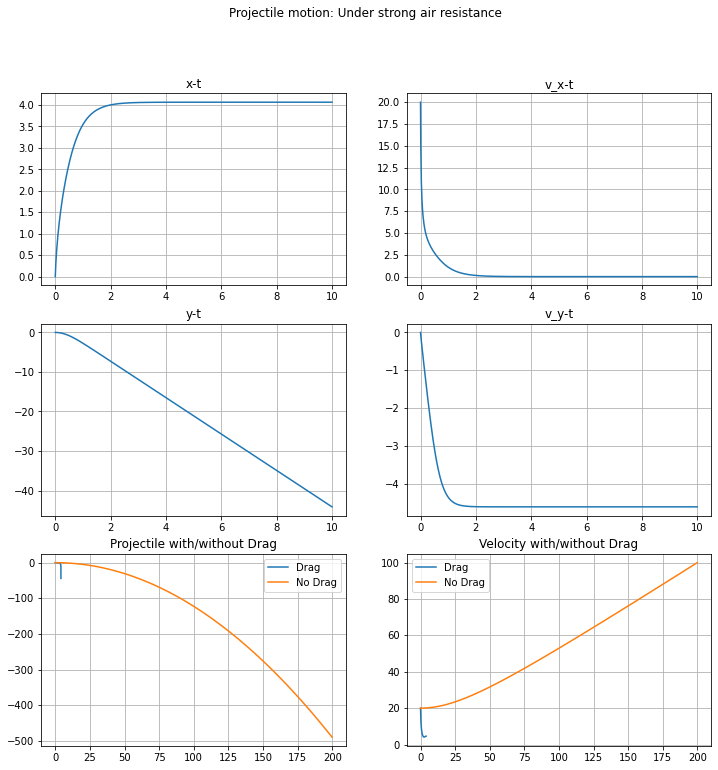

In [2]:
x = 0.
v_x = 20.
y = 0.
v_y = 0.
y_0 = [x, v_x, y, v_y]

g = 9.8
c = 0.1

t = np.arange(0, 10, 0.01)

x_analytical = x + v_x * t
y_analytical = - g * 0.5 * t**2 + y + v_y * t
v_analytical = np.sqrt(v_x**2 + (v_y - g * t)**2)


def func(y, t):  # define vector f(y,t)
    x, v_x, y, v_y = y
    v = np.sqrt(v_x**2 + v_y**2)
    a_x = -c * v**2 * v_x
    a_y = -g - (c * v**2 * v_y)
    return [v_x, a_x, v_y, a_y]


vec = odeint(func, y_0, t)
x = vec[:, 0]
v_x = vec[:, 1]
y = vec[:, 2]
v_y = vec[:, 3]
v = np.sqrt(v_x**2 + v_y**2)

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Projectile motion: Under strong air resistance')

sns.lineplot(ax=axes[0, 0], x=t, y=x)
axes[0, 0].set_title("x-t")
axes[0, 0].grid()

sns.lineplot(ax=axes[0, 1], x=t, y=v_x)
axes[0, 1].set_title("v_x-t")
axes[0, 1].grid()

sns.lineplot(ax=axes[1, 0], x=t, y=y)
axes[1, 0].set_title("y-t")
axes[1, 0].grid()

sns.lineplot(ax=axes[1, 1], x=t, y=v_y)
axes[1, 1].set_title("v_y-t")
axes[1, 1].grid()

sns.lineplot(ax=axes[2, 0], x=x, y=y, label='Drag')
sns.lineplot(ax=axes[2, 0], x=x_analytical, y=y_analytical, label='No Drag')
axes[2, 0].set_title("Projectile with/without Drag")
axes[2, 0].grid()
axes[2,0].legend()

sns.lineplot(ax=axes[2, 1], x=x, y=v, label='Drag')
sns.lineplot(ax=axes[2, 1], x=x_analytical, y=v_analytical, label='No Drag')
axes[2, 1].set_title("Velocity with/without Drag")
axes[2, 1].grid()
axes[2,1].legend()
plt.show()